<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preliminary-EDA" data-toc-modified-id="Preliminary-EDA-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Preliminary EDA</a></span></li></ul></li><li><span><a href="#Getting-datasets-ready" data-toc-modified-id="Getting-datasets-ready-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting datasets ready</a></span><ul class="toc-item"><li><span><a href="#Joining-dataframes" data-toc-modified-id="Joining-dataframes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Joining dataframes</a></span></li><li><span><a href="#Host-and-Listing-counts" data-toc-modified-id="Host-and-Listing-counts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Host and Listing counts</a></span></li><li><span><a href="#Listing-Name-analysis" data-toc-modified-id="Listing-Name-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Listing Name analysis</a></span></li></ul></li><li><span><a href="#Charts" data-toc-modified-id="Charts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Charts</a></span></li><li><span><a href="#Preping-dataset-for-training" data-toc-modified-id="Preping-dataset-for-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preping dataset for training</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Sin-transformation-for-date" data-toc-modified-id="Sin-transformation-for-date-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sin transformation for date</a></span></li><li><span><a href="#Standardize-Numerical-Variables" data-toc-modified-id="Standardize-Numerical-Variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Standardize Numerical Variables</a></span></li><li><span><a href="#Changing-Binary-Variables-to-0-&amp;-1" data-toc-modified-id="Changing-Binary-Variables-to-0-&amp;-1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Changing Binary Variables to 0 &amp; 1</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model:-Logistic-Regression" data-toc-modified-id="Baseline-Model:-Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline Model: Logistic Regression</a></span></li><li><span><a href="#Univariate-feature-selection" data-toc-modified-id="Univariate-feature-selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Univariate feature selection</a></span></li></ul></li></ul></div>

In [159]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
import seaborn as sns
from math import sqrt, sin
from datetime import datetime
%matplotlib inline

In [160]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
# demographics = pd.read_csv("airbnb_data/demographics.csv")
# econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
# real_estate = pd.read_csv("airbnb_data/real_estate.csv")
# venues = pd.read_csv("airbnb_data/venues.csv")
mth_avail = pd.read_csv('full_mth_avail_listings.csv')

In [161]:
# dataset_names = ["calendar", "demographics", "econ_state", "listings", "real_estate", "venues"]
# datasets = [calendar, demographics, econ_state, listings, real_estate, venues]
dataset_names = ['mth_avail','listings']
datasets = [mth_avail, listings]

## Preliminary EDA

In [162]:
for i in range(len(datasets)):
    print(dataset_names[i])
    print(datasets[i].keys())
    print()

mth_avail
Index(['host_id', 'listing_id', 'accommodates', 'amenities', 'availability_30',
       'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy',
       'city', 'instant_bookable', 'latitude', 'longitude', 'metropolitan',
       'name', 'price', 'property_type', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'state', 'weekly_price', 'zipcode', 'no_months',
       'host_no_listings'],
      dtype='object')

listings
Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       '

In [163]:
# demographics[demographics["zipcode"] // 1000 == 10]

In [164]:
# calendar.plot(x="date", y="price")
# plt.show()

# Getting datasets ready

In [165]:
# calendar = calendar.set_index("listing_id")
# listings = listings.set_index("id")a

In [166]:
# calendar = calendar[calendar['metro_area'] == 'NYC']
listings = listings[listings['state'] == 'NY']

## Joining dataframes

In [167]:
df = listings.set_index("id").join(mth_avail[['listing_id', 'no_months']].set_index("listing_id"), how='inner')

In [168]:
df = df.reset_index()

In [169]:
df = df.rename(columns={"index": "listing_id"})

In [170]:
df.shape

(22837, 30)

In [171]:
listings.shape

(40738, 29)

In [172]:
mth_avail.shape

(22837, 30)

In [173]:
df = df.drop(columns='has_availability')

In [174]:
# del(high_month)
# del(listings)

## Host and Listing counts

In [175]:
df['listing_id'].value_counts()

17860607    1
147474      1
6122120     1
13826698    1
51852       1
744078      1
7547536     1
3272201     1
5681811     1
3312276     1
15932054    1
6853271     1
60056       1
17758874    1
9237147     1
5229212     1
311965      1
5619149     1
12866207    1
16394912    1
3908257     1
70279       1
9411206     1
5210757     1
3328706     1
17189484    1
10838084    1
13914735    1
7776880     1
4405874     1
           ..
1873304     1
14917017    1
17796507    1
18483303    1
5455261     1
8793503     1
4347296     1
12082561    1
4098456     1
2608483     1
1561968     1
12299794    1
5565799     1
525674      1
16496661    1
14628204    1
6462549     1
16164206    1
14069103    1
8635762     1
17382781    1
839027      1
14120308    1
294490      1
17500929    1
8729771     1
12223866    1
16572212    1
8069858     1
14215652    1
Name: listing_id, Length: 22837, dtype: int64

In [176]:
print("There are", df['host_id'].nunique(), "unique hosts")
print("There are", df['listing_id'].nunique(), "unique listings")

There are 18214 unique hosts
There are 22837 unique listings


In [177]:
df['host_id'].value_counts()

26377263     32
51913826     31
417504       28
81634538     20
8874674      18
440022       16
47554473     15
31307789     14
96098402     13
30283594     12
69545883     11
44965197     11
16677326     11
45792947     11
64065593     11
38123545     11
35524316     11
4014688      11
3191545      11
122945571    10
76176481     10
525710       10
17916897     10
25237492     10
67954495      9
108049235     9
9820942       9
6885157       9
8327019       9
33119567      9
             ..
1698259       1
114416273     1
23032458      1
40040638      1
3541643       1
61276810      1
39942789      1
676480        1
42154621      1
52441724      1
6097531       1
26429465      1
103158392     1
123789006     1
2361525       1
1626704       1
32492147      1
4272748       1
330347        1
45775461      1
23976545      1
44454496      1
45550171      1
36246104      1
124709463     1
13951574      1
21721684      1
48286291      1
1491538       1
561154        1
Name: host_id, Length: 1

In [197]:
df.keys()

Index(['listing_id', 'accommodates', 'amenities', 'availability_30',
       'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy',
       'city', 'host_id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'no_months'],
      dtype='object')

In [208]:
df['review_scores_rating'].unique()

array([100.,  89.,  92.,  99.,  91.,  87.,  85.,  94.,  98.,  97.,  73.,
        nan,  84.,  95.,  93.,  90.,  81.,  82.,  96.,  83.,  80.,  86.,
        70.,  78.,  88.,  74.,  79.,  50.,  76.,  60.,  69.,  75.,  77.,
        67.,  40.,  68.,  65.,  20.,  53.,  63.,  72.,  71.,  64.,  43.,
        66.,  62.,  57.,  47.,  30.,  56.,  48.,  27.])

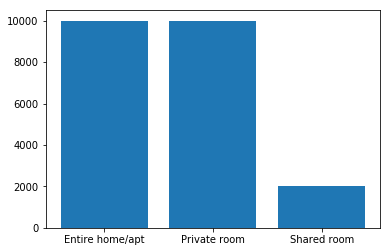

In [210]:
plt.bar(df['room_type'], df['price'])
plt.show()

In [207]:
df['review_scores_value'].unique()

array([10.,  9.,  8., nan,  7.,  5.,  6.,  4.,  2.,  3.])

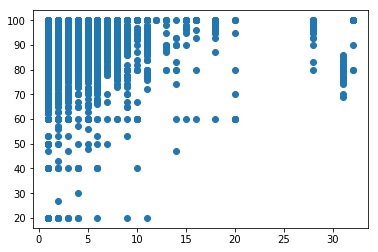

In [206]:
plt.scatter(df['host_no_listings'], df['review_scores_rating'])

In [202]:
df[df['host_no_listings'] > 25]

,listing_id,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,no_months,host_no_listings
host_id,,,,,,,,,,,,,,,,,,,,,
417504,294263,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",24,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,98.0,9.0,Entire home/apt,NY,NaN,11222.0,11,28
417504,294227,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,99.0,10.0,Entire home/apt,NY,NaN,11222.0,12,28
417504,294490,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,8.0,96.0,9.0,Entire home/apt,NY,NaN,11222.0,12,28
417504,253815,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,98.0,9.0,Entire home/apt,NY,NaN,11222.0,12,28
417504,253803,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,0.0,2.0,strict,brooklyn,...,10.0,9.0,98.0,9.0,Entire home/apt,NY,NaN,11222.0,12,28
417504,727512,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,93.0,9.0,Entire home/apt,NY,NaN,11222.0,11,28
417504,77765,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",30,1.0,Real Bed,1.0,1.0,strict,brooklyn,...,10.0,9.0,98.0,9.0,Private room,NY,NaN,11222.0,12,28
417504,727547,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",16,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,96.0,9.0,Entire home/apt,NY,NaN,11222.0,10,28
417504,253466,4.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",30,1.0,Real Bed,NaN,2.0,strict,brooklyn,...,10.0,9.0,96.0,9.0,Entire home/apt,NY,NaN,11222.0,12,28


In [121]:
df.nunique()

listing_id                     22837
accommodates                      16
amenities                      20227
availability_30                   31
bathrooms                         15
bed_type                           5
bedrooms                          11
beds                              16
cancellation_policy                6
city                              80
instant_bookable                   2
latitude                       22837
longitude                      22837
metropolitan                       1
name                           22525
price                            542
property_type                     24
review_scores_checkin              9
review_scores_cleanliness          9
review_scores_communication        9
review_scores_location             9
review_scores_rating              51
review_scores_value                9
room_type                          3
state                              1
weekly_price                     629
zipcode                          278
n

## Listing Name analysis

In [181]:
df['name'] = df['name'].fillna('blank')

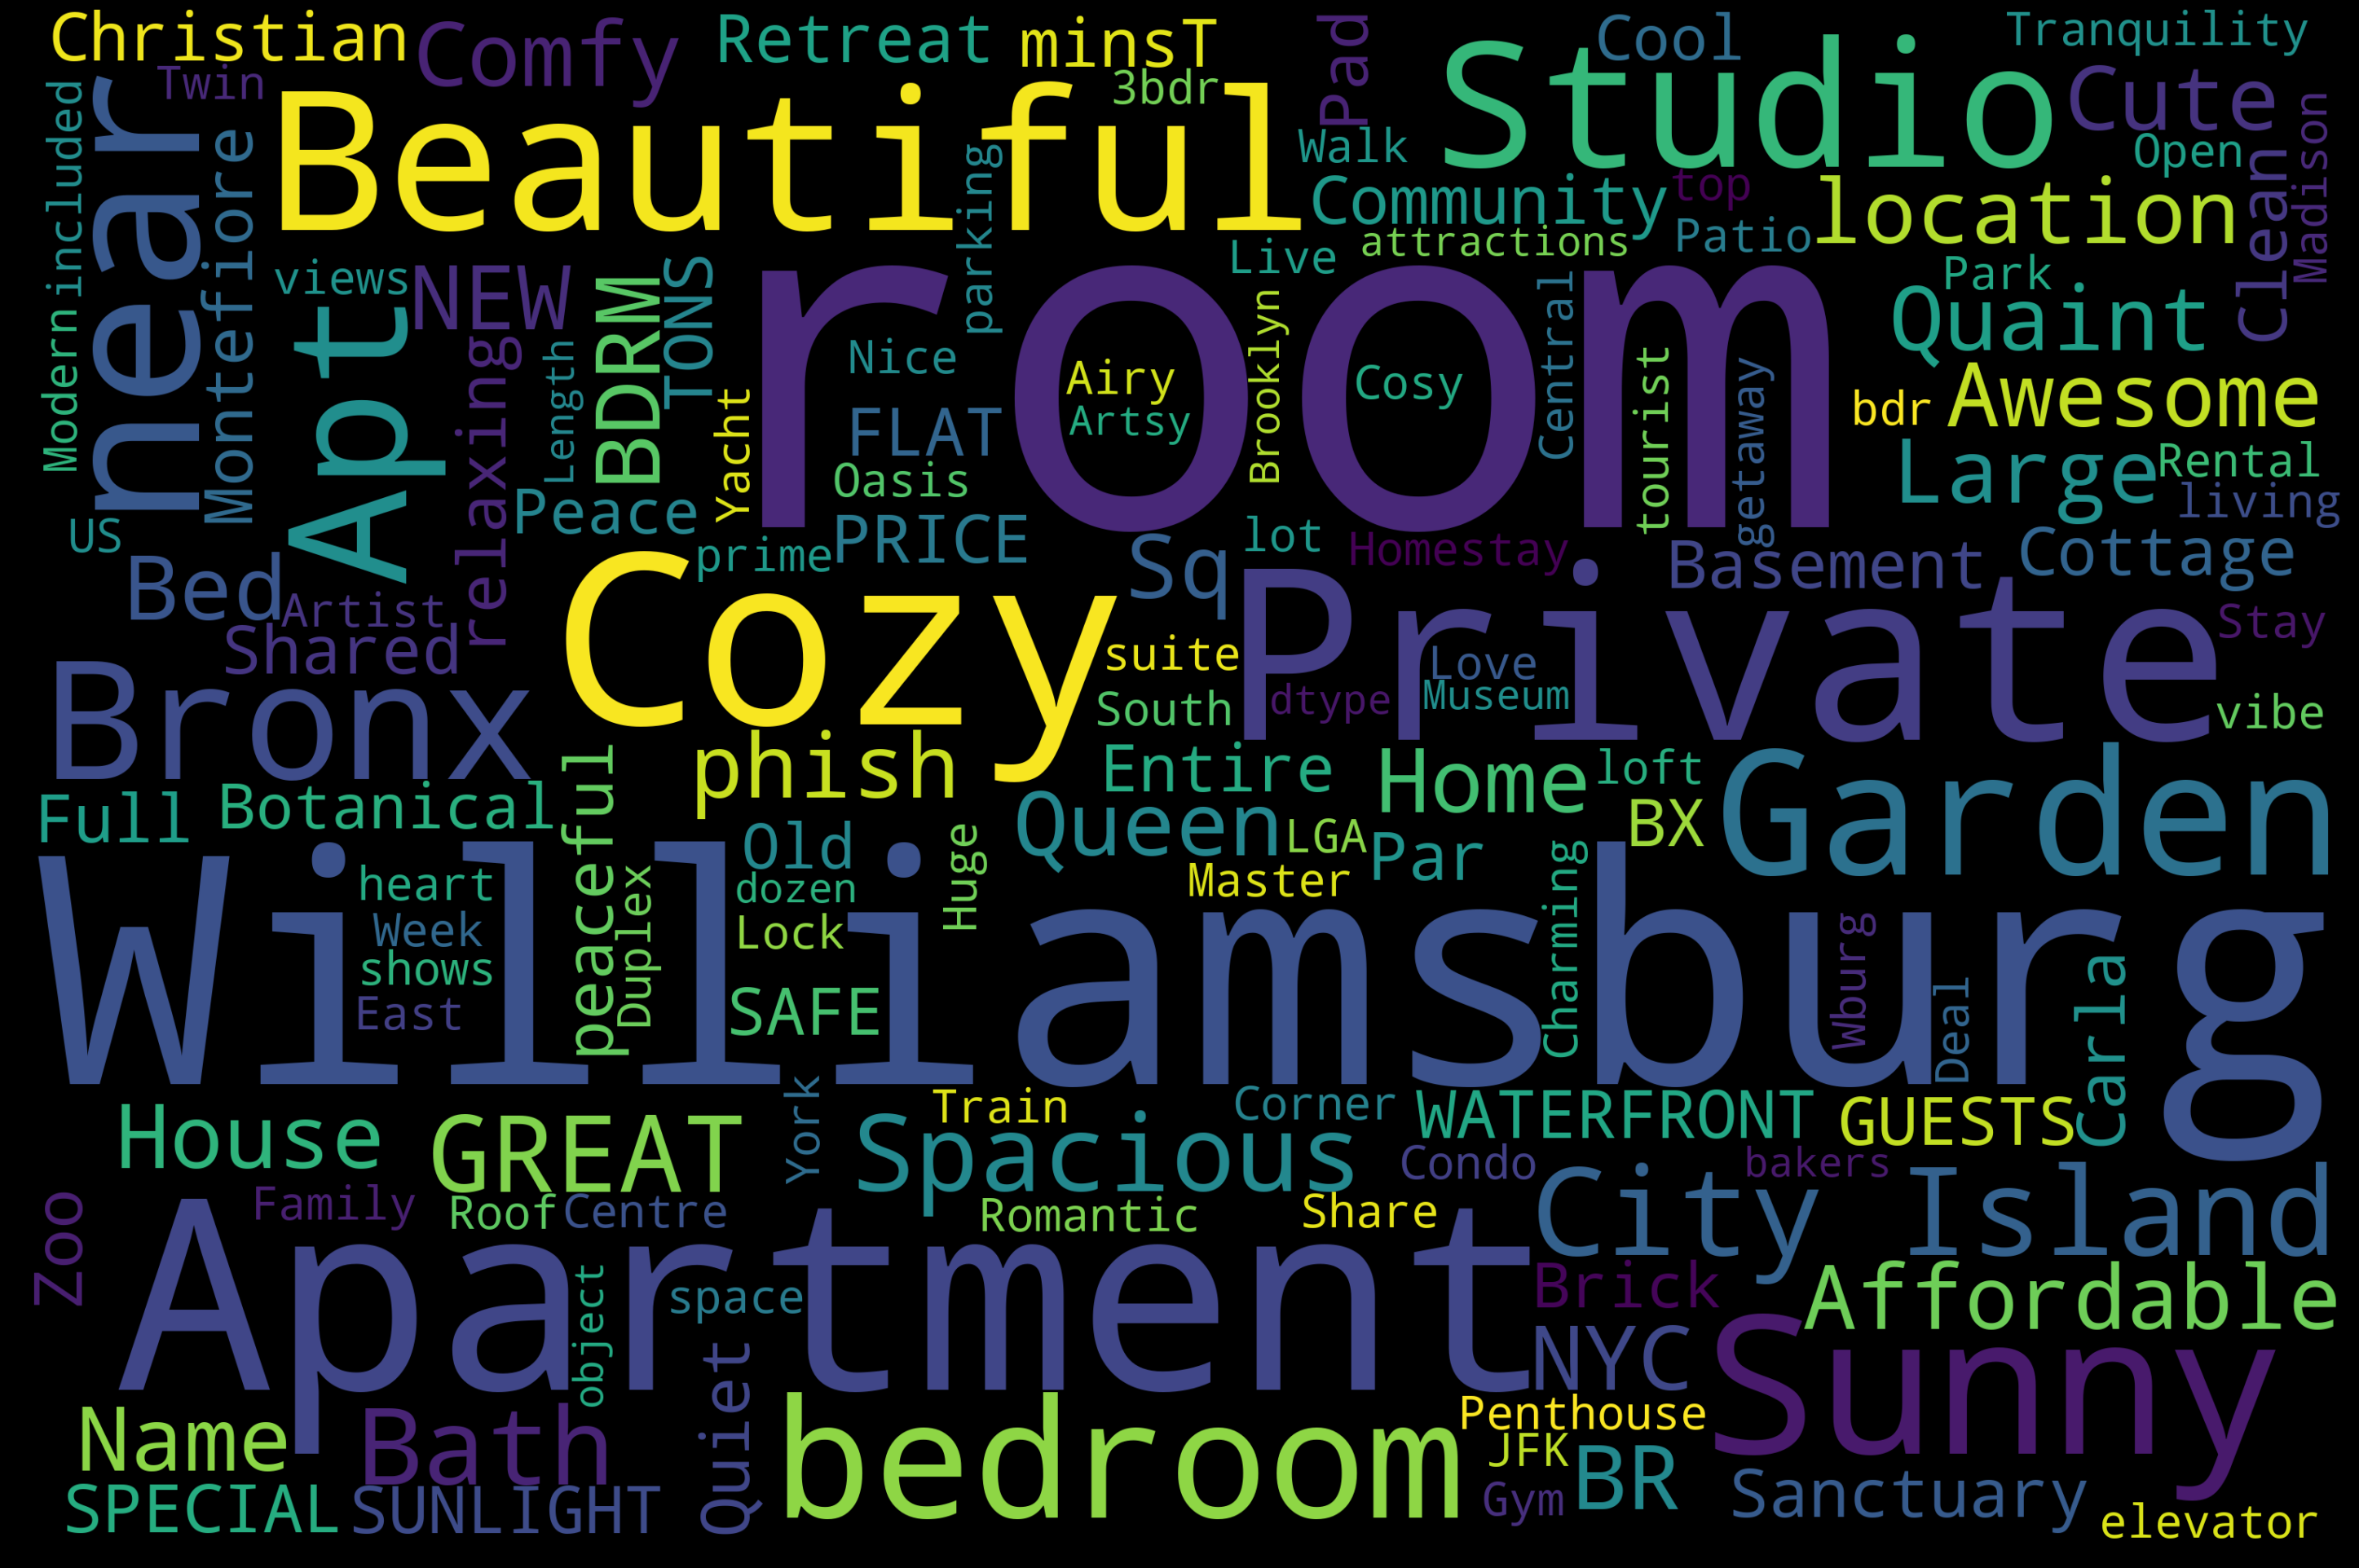

In [184]:
from wordcloud import WordCloud, STOPWORDS
text = listings['name']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [193]:
df.keys()

Index(['listing_id', 'accommodates', 'amenities', 'availability_30',
       'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy',
       'city', 'host_id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'no_months'],
      dtype='object')

In [195]:
df[df['name'].str.contains('hristian')][['state', 'metropolitan', 'name']]

,state,metropolitan,name
10,NY,NYC,THE ROOM by Christian and Carla


In [84]:
df.keys()

Index(['listing_id', 'accommodates', 'amenities', 'availability_30',
       'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy',
       'city', 'has_availability', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'no_months', 'host_no_listings'],
      dtype='object')

In [198]:
host_no_listings = df['host_id'].value_counts().rename_axis('host_id').reset_index(name='host_no_listings')
df = df.set_index("host_id").join(host_no_listings.set_index("host_id"), how='inner')

In [199]:
df.shape

(22837, 29)

In [200]:
host_no_listings.shape

(18214, 2)

In [201]:
host_no_listings.shape

(18214, 2)

# Charts

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


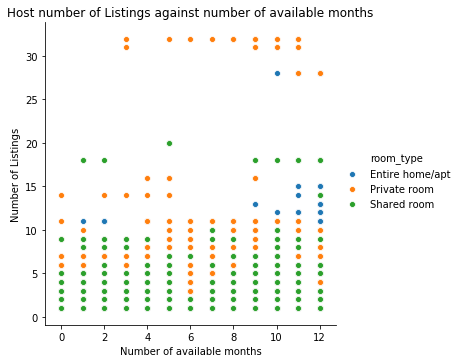

In [211]:
sns.pairplot(x_vars=["no_months"], y_vars=["host_no_listings"], data=df, hue="room_type", size=5)
plt.title('Host number of Listings against number of available months')
plt.xlabel('Number of available months')
plt.ylabel('Number of Listings')
plt.show()

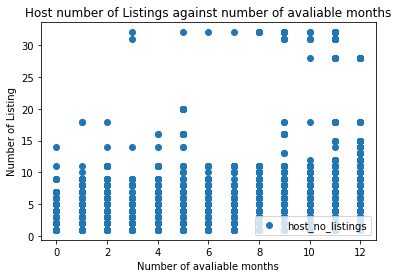

In [87]:
plt.scatter(df['no_months'], df['host_no_listings'])
plt.legend(loc='lower right')
plt.title('Host number of Listings against number of available months')
plt.xlabel('Number of available months')
plt.ylabel('Number of Listings')
plt.show()

# Preping dataset for training

In [855]:
#Getting list of column headers
features_list = df.columns.tolist()
print(features_list)

['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability', 'host_id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'name', 'price', 'property_type', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'room_type', 'state', 'weekly_price', 'zipcode', 'no_months']


In [857]:
df.shape

(140526, 28)

In [858]:
df.isnull().sum()

accommodates                        0
amenities                           0
availability_30                     0
bathrooms                        1083
bed_type                            0
bedrooms                          443
beds                              351
cancellation_policy                 0
city                              290
host_id                             0
instant_bookable                    0
latitude                            0
longitude                           0
metropolitan                        0
name                              145
price                               0
property_type                       0
review_scores_checkin           25846
review_scores_cleanliness       25685
review_scores_communication     25686
review_scores_location          25839
review_scores_rating            25505
review_scores_value             25869
room_type                           0
state                               0
weekly_price                   104817
zipcode     

In [859]:
df.dropna().shape

(31673, 28)

In [860]:
df = df.dropna()

In [861]:
df.isnull().sum()

accommodates                   0
amenities                      0
availability_30                0
bathrooms                      0
bed_type                       0
bedrooms                       0
beds                           0
cancellation_policy            0
city                           0
host_id                        0
instant_bookable               0
latitude                       0
longitude                      0
metropolitan                   0
name                           0
price                          0
property_type                  0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
room_type                      0
state                          0
weekly_price                   0
zipcode                        0
no_months                      0
dtype: int64

In [862]:
len(features_list)

29

In [863]:
df.dtypes

accommodates                   float64
amenities                       object
availability_30                  int64
bathrooms                      float64
bed_type                        object
bedrooms                       float64
beds                           float64
cancellation_policy             object
city                            object
host_id                          int64
instant_bookable                object
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
price                          float64
property_type                   object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value            float64
room_type                       object
state                           object
weekly_price             

In [864]:
df.nunique()

accommodates                     16
amenities                      4404
availability_30                  31
bathrooms                        11
bed_type                          5
bedrooms                          9
beds                             13
cancellation_policy               4
city                             35
host_id                        3984
instant_bookable                  2
latitude                       4727
longitude                      4727
metropolitan                      1
name                           4712
price                           312
property_type                    14
review_scores_checkin             8
review_scores_cleanliness         9
review_scores_communication       8
review_scores_location            8
review_scores_rating             42
review_scores_value               9
room_type                         3
state                             1
weekly_price                    605
zipcode                         217
no_months                   

In [865]:
#List of different types of features
id_list = ['host_id',]
target_list = ['no_months',]
flag_list = ['availability_30', 'amenities', 'has_availability', 'latitude', 'longitude', 'name', 'zipcode', 'state', 'metropolitan', 'metro_area'] # flag to remove
num_list = [col for col in df.columns if df[col].nunique()>7 and col not in id_list and col not in flag_list]
cat_list = [col for col in df.columns if df[col].nunique()<=7 and col not in target_list and col not in flag_list]
transfer = ['property_type', 'city'] #has >8 unique but is catergorical var
for x in (id_list + target_list + flag_list):
    if x in features_list:
        features_list.remove(x)
features_list

['accommodates',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'instant_bookable',
 'price',
 'property_type',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'room_type',
 'weekly_price']

In [866]:
# num_list.remove('date')
# features_list.remove('date')

In [867]:
print(len(num_list))
print(len(cat_list))

15
4


In [868]:
for x in transfer:
    print(x)
    num_list.remove(x)
    cat_list.append(x)

property_type
city


In [869]:
print(len(num_list))
print(len(cat_list))

13
6


In [870]:
df = df.reset_index()

# Data Pre-Processing

## Sin transformation for date

In [871]:
# df['date'] = pd.to_datetime(df['date'])

In [872]:
# print('max:', max(df['date']))
# print('min:', min(df['date']))

In [873]:
# date_format = "%Y-%m-%d"
# start = datetime.strptime('2017-05-05', date_format)

In [874]:
# df.shape

In [875]:
# # Sin transformation
# df['days_from_5May'] = np.sin(((df['date'] - start).dt.days) / 365 * 360)

In [876]:
# num_list.append('days_from_5May')

In [877]:
# print(num_list)
# print(cat_list)

## Standardize Numerical Variables

In [879]:
# Load libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling Numerical Columns
# Standardize features: Z-index
scaler = MinMaxScaler()
num_std = scaler.fit_transform(df[num_list])
num_std = pd.DataFrame(num_std, columns = num_list)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [880]:
df.isnull().sum()

index                          0
accommodates                   0
amenities                      0
availability_30                0
bathrooms                      0
bed_type                       0
bedrooms                       0
beds                           0
cancellation_policy            0
city                           0
host_id                        0
instant_bookable               0
latitude                       0
longitude                      0
metropolitan                   0
name                           0
price                          0
property_type                  0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
room_type                      0
state                          0
weekly_price                   0
zipcode                        0
no_months                      0
dtype: int64

In [881]:
# #Merging scaled numerical data with catergorical data
df_old = df.copy()
df = df.drop(columns = num_list)
df = df.merge(num_std, left_index=True, right_index=True, how='left')

## Changing Binary Variables to 0 & 1

In [882]:
# dropping incomplete rows
for name in cat_list:
    df = df[df['name'].notna()]

In [883]:
df.shape

(31673, 29)

In [884]:
for name in cat_list:
    print(name)
    print(df[name].unique())
    print()

bed_type
['Real Bed' 'Airbed' 'Pull-out Sofa' 'Futon' 'Couch']

cancellation_policy
['strict' 'moderate' 'flexible' 'no_refunds']

instant_bookable
['f' 't']

room_type
['Private room' 'Entire home/apt' 'Shared room']

property_type
['Apartment' 'Other' 'Condominium' 'Bed & Breakfast' 'House' 'Townhouse'
 'Loft' 'Villa' 'Boat' 'Guesthouse' 'Dorm' 'In-law' 'Castle' 'Bungalow']

city
['new york' 'brooklyn' 'queens' 'sunnysidebronx' 'astoria'
 'long island city' 'staten island' 'jamaica' 'east elmhurst' 'kips bay'
 'manhattan' 'park slope' 'flushing' 'bellerose' 'woodside' 'greenpoint'
 'corona' 'arverne' 'far rockaway' 'ridgewood' 'howard beach' 'nyc'
 'bayside' 'jackson heights' 'bushwick' 'richmond hill' 'lic'
 'williamsburg' 'hollis' 'ozone park' 'east williamsburg' 'chelsea'
 'maspeth' 'kew gardens' 'saint albans']



In [885]:
df[cat_list].nunique()

bed_type                5
cancellation_policy     4
instant_bookable        2
room_type               3
property_type          14
city                   35
dtype: int64

In [886]:
#Processing Binary Catergorical Variables
for name in ['instant_bookable']:
    df[name] = df[name].map(lambda x: 1 if x=='t' else 0)

In [887]:
cat_list

['bed_type',
 'cancellation_policy',
 'instant_bookable',
 'room_type',
 'property_type',
 'city']

In [888]:
#Columns with non_binary categorical variables
df = pd.get_dummies(data = df, columns = ['bed_type','cancellation_policy','room_type','property_type', 'city'])

In [889]:
df.dtypes

index                             int64
amenities                        object
availability_30                   int64
host_id                           int64
instant_bookable                  int64
latitude                        float64
longitude                       float64
metropolitan                     object
name                             object
state                            object
zipcode                          object
accommodates                    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
review_scores_checkin           float64
review_scores_cleanliness       float64
review_scores_communication     float64
review_scores_location          float64
review_scores_rating            float64
review_scores_value             float64
weekly_price                    float64
no_months                       float64
bed_type_Airbed                   uint8


In [890]:
df.describe()

,index,availability_30,host_id,instant_bookable,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,city_ozone park,city_park slope,city_queens,city_richmond hill,city_ridgewood,city_saint albans,city_staten island,city_sunnysidebronx,city_williamsburg,city_woodside
count,3.167300e+04,31673.000000,3.167300e+04,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,...,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000,31673.000000
mean,4.097802e+06,12.228018,1.321393e+07,0.138793,40.725918,-73.950060,0.117530,0.203592,0.145637,0.036361,...,0.000347,0.000347,0.068292,0.000347,0.001137,0.000347,0.009282,0.024279,0.000474,0.001421
std,3.180526e+06,11.052758,1.437743e+07,0.345736,0.058922,0.046207,0.117379,0.066828,0.080501,0.071025,...,0.018633,0.018633,0.252250,0.018633,0.033695,0.018633,0.095898,0.153918,0.021757,0.037667
min,2.515000e+03,0.000000,2.758000e+03,0.000000,40.550734,-74.170675,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.138455e+06,2.000000,2.305477e+06,0.000000,40.684386,-73.979364,0.066667,0.181818,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.868344e+06,9.000000,7.154617e+06,0.000000,40.715796,-73.952451,0.066667,0.181818,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.480685e+06,23.000000,2.122837e+07,0.000000,40.763709,-73.935038,0.133333,0.181818,0.125000,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.654028e+07,30.000000,9.605363e+07,1.000000,40.897475,-73.723488,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [891]:
features_list = df.columns.tolist()

In [897]:
for x in (id_list + target_list + flag_list):
    if x in features_list:
        features_list.remove(x)
features_list.remove('index')

In [898]:
len(features_list)

74

In [899]:
for name in features_list:
    if max(df[name] == 0):
        df.drop(columns = name)
        features_list.remove(name)

In [900]:
len(features_list)

37

In [901]:
print(features_list)

['accommodates', 'bedrooms', 'price', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Real Bed', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'room_type_Private room', 'property_type_Apartment', 'property_type_Boat', 'property_type_Castle', 'property_type_Dorm', 'property_type_House', 'property_type_Loft', 'property_type_Townhouse', 'city_arverne', 'city_bayside', 'city_brooklyn', 'city_chelsea', 'city_east elmhurst', 'city_far rockaway', 'city_greenpoint', 'city_howard beach', 'city_jamaica', 'city_kips bay', 'city_long island city', 'city_maspeth', 'city_nyc', 'city_park slope', 'city_richmond hill', 'city_saint albans', 'city_sunnysidebronx', 'city_woodside']


In [902]:
plt.figure(figsize=(10,10))
cor = df[features_list].corr()

<Figure size 720x720 with 0 Axes>

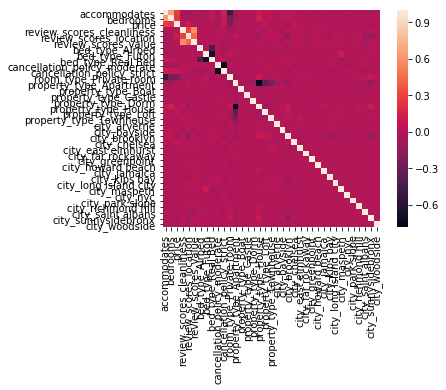

In [903]:
sns.heatmap(cor, square = True, xticklabels=True, yticklabels=True)
plt.show()

In [904]:
# Checking for high correlation coefficients > 0.75
for i in cor.keys():
    for j in cor.keys():
        if cor[i][j] > 0.75 and cor[i][j] <1 and i < j:
            print (cor[i][j], '=','cor('+i,',',j+')')

# Modelling

In [907]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [908]:
# Create a 5-fold cross validation
kf = KFold(n_splits = 5, shuffle=True, random_state = 12345)

In [909]:
# For saving cross validation accuracy and confusion matrices for the different models
cv = {}
cm = {}
cma = {}
coeffs = {}
fpr = {}
tpr = {}
roc_auc = {}

In [910]:
def prediction(model, model_name, feature_weights):
    print('##### Model',model_name,'#####')

    # Cross Validation
    cv[model_name] = cross_val_score(model, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    print('Report Average Cross-Validation Accuracy of',model_name+':')
    print(np.mean(cv[model_name])*100, '%')

    # Fit the model on train data
    model.fit(X=X_train, y=y_train)

    # Predict outputs for test data
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm[model_name] = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix of',model_name)
    print(cm[model_name])
    cma[model_name] = accuracy_score(y_test, y_pred)
    print("Confusion Matrix Prediction Accuracy: ", cma[model_name]*100,'%')

    # ROC and AUC
    # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    # model.classes_
    score = model.predict_proba(X_test)[:, 1]

    # Plot ROC Curve
    fpr[model_name], tpr[model_name], thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('Receiver operating characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Get feature weights
    if feature_weights:
        if feature_weights == "coeff":
            weights = pd.DataFrame(model.coef_[0])
        elif feature_weights == "features":
            weights = pd.DataFrame(model.feature_importances_)
        # Bagging method makes use of many decision trees
        elif feature_weights == "bagging":
            weights = np.mean([tree.feature_importances_ for tree in model.estimators_], axis = 0)
            weights = pd.DataFrame(weights)

        coeffs[model_name] = pd.merge(pd.DataFrame(model_features),weights, left_index=True, right_index=True, how='left')
        coeffs[model_name].columns = ['Feature', 'Weights']
        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights')

        plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
        plt.title('Feature Weights')
        plt.show()

        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights', ascending=False)
        print(coeffs[model_name])

In [911]:
def set_train_test(df, features_list, target_list):
    global X, y, X_train, X_test, y_train, y_test
    
    X = df[features_list]
    y = df[target_list[0]]

    # Do train-test split: 70% train and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [912]:
set_train_test(df, features_list, target_list)

## Baseline Model: Logistic Regression

In [913]:
set_train_test(df, features_list, target_list)

In [914]:
# Logistic regression using L1-regularization
lr1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0)

# Logistic regression using L2-regularization
lr2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)

model_features = features_list

In [915]:
prediction(lr1, 'L1 Logistic Regression', 'coeff')

##### Model L1 Logistic Regression #####


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

## Univariate feature selection

In [256]:
df.isnull().sum()

date                           0
available                      0
metro_area                     0
amenities                      0
host_id                        0
instant_bookable               0
latitude                       0
longitude                      0
metropolitan                   0
name                           0
state                          0
zipcode                        0
listed price                   0
accommodates                   0
availability_30                0
bathrooms                      0
bedrooms                       0
beds                           0
original price                 0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
weekly_price                   0
bed_type_Airbed                0
bed_type_Couch                 0
bed_type_Futon                 0
bed_type_Pull-out Sofa         0
          

In [216]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [257]:
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(X,y)

In [258]:
score = pd.DataFrame({"features":features_list,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
score

,features,scores,p_values
16,room_type_Entire home/apt,310.997215,1.324309e-69
13,cancellation_policy_flexible,242.187210,1.311611e-54
61,city_queens,217.441171,3.269971e-49
15,cancellation_policy_strict,213.904918,1.931790e-48
14,cancellation_policy_moderate,212.640773,3.645363e-48
25,property_type_House,209.626836,1.656837e-47
17,room_type_Shared room,146.074473,1.250433e-33
54,city_long island city,115.237183,6.982599e-27
19,property_type_Boutique hotel,103.472020,2.640977e-24
37,city_brooklyn,90.929563,1.488786e-21
